In [1]:
import qiskit
from qiskit import IBMQ
import matplotlib.pyplot as plt
provider = IBMQ.load_account()

In [2]:
from qiskit import execute 
from qiskit import BasicAer
from qiskit.providers.ibmq import least_busy 
#from qiskit.visualization import plot_histogram

In [3]:
qr = qiskit.QuantumRegister(2)
cr = qiskit.ClassicalRegister(2)
circuit = qiskit.QuantumCircuit(qr, cr) 

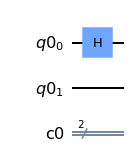

In [4]:
# applying hadamard gate 
circuit.h(qr[0])
circuit.draw(output = 'mpl')

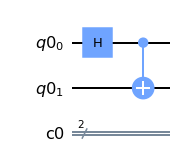

In [5]:
# applying cnot gate 
circuit.cx(qr[0], qr[1]) # controlled bit, target bit
circuit.draw(output = 'mpl')

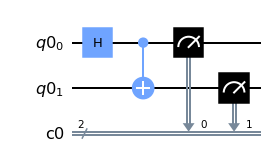

In [6]:
circuit.measure(qr, cr)
circuit.draw(output ='mpl')

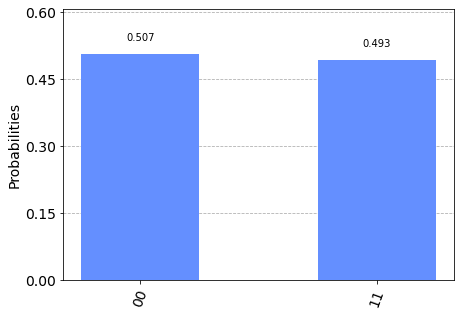

In [7]:
simulator = qiskit.Aer.get_backend('qasm_simulator') 
results = qiskit.execute(circuit, backend=simulator).result()
qiskit.visualization.plot_histogram(results.get_counts(circuit))

In [8]:
n =2
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= (n+1) and not x.configuration().simulator and x.status().operational == True))
print("least busy backend :", backend)

least busy backend : ibmq_lima


In [9]:
job = qiskit.execute(circuit, backend= backend, shots = 1000, optimization_level = 3)

In [10]:

q_result = job.result()

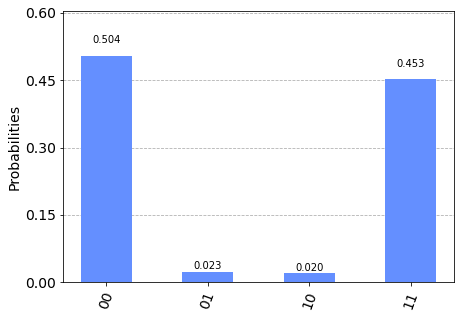

In [11]:
qiskit.visualization.plot_histogram(q_result.get_counts(circuit))